# Table of Contents

#### Import libraries and datasets
#### Data checks
#### Plot linechart of data
#### Decompose the data’s components
#### Perform Dickey Fuller Test
#### Check autocorrelations

## Import libraries and datasets

In [21]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from datetime import datetime


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [22]:
%matplotlib inline

In [23]:
path = r'C:\Users\Andrew\Desktop\Data project'

In [24]:
citi22 = pd.read_pickle(os.path.join(path, '02 data', 'clean', 'citi22.pkl'))

In [25]:
pd.set_option("display.max_columns", None)

## Data checks

In [27]:
citi22.describe()

,start_latitude,start_longitude,end_latitude,end_longitude,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency
count,892281.000000,892281.000000,892281.000000,892281.000000,892281.000000,892281.000000,892281.000000,892281.000000,892281.000000,892281,892281.000000,892281.000000,892281.000000
mean,40.731935,-74.040441,40.731873,-74.040193,0.658458,14.259669,15.827998,3.033998,7.165403,0 days 00:13:41.027037446,13.683778,15946.908067,16250.455100
std,0.012089,0.012191,0.012215,0.012158,0.474227,5.120881,8.715811,1.955269,2.846962,0 days 01:21:37.279401564,81.621323,9824.061074,10276.245047
min,40.706495,-74.088964,40.663062,-74.088964,0.000000,0.000000,1.000000,0.000000,1.000000,-1 days +23:04:29,-55.520000,2.000000,1.000000
25%,40.721124,-74.046305,40.721124,-74.045953,0.000000,10.000000,8.000000,1.000000,5.000000,0 days 00:04:30,4.500000,9241.000000,9260.000000
50%,40.733670,-74.037977,40.733670,-74.037683,1.000000,15.000000,16.000000,3.000000,7.000000,0 days 00:07:11,7.180000,13540.000000,13882.000000
75%,40.740973,-74.030970,40.740973,-74.030970,1.000000,18.000000,23.000000,5.000000,9.000000,0 days 00:12:09,12.150000,19917.000000,20168.000000
max,40.754992,-74.023490,40.872412,-73.888271,1.000000,23.000000,31.000000,6.000000,12.000000,19 days 19:41:30,28541.500000,42455.000000,44730.000000


In [28]:
citi22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892281 entries, 0 to 48584
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   rideable_type            892281 non-null  object         
 1   started_at               892281 non-null  datetime64[ns] 
 2   ended_at                 892281 non-null  datetime64[ns] 
 3   start_station_name       892281 non-null  object         
 4   start_station_id         892281 non-null  object         
 5   end_station_name         892281 non-null  object         
 6   end_station_id           892281 non-null  object         
 7   start_latitude           892281 non-null  float64        
 8   start_longitude          892281 non-null  float64        
 9   end_latitude             892281 non-null  float64        
 10  end_longitude            892281 non-null  float64        
 11  member_type              892281 non-null  int32          
 12  sta

### Convert dates to datetime format

In [29]:
citi22['start_date'] = pd.to_datetime(citi22['started_at']).dt.date

In [30]:
citi22['end_date'] = pd.to_datetime(citi22['ended_at']).dt.date

### Create uses_by_date column

In [31]:
# Filler column for transformation
citi22['1col'] = 1

In [32]:
citi22["uses_by_date"] = citi22.groupby("start_date")['1col'].transform("sum")

In [33]:
citi22.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,start_date,end_date,1col,uses_by_date
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518,2022-01-26,2022-01-26,1,1147
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989,2022-01-28,2022-01-28,1,891
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989,2022-01-10,2022-01-10,1,806
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518,2022-01-26,2022-01-26,1,1147
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518,2022-01-13,2022-01-13,1,1180


### Export

In [35]:
citi22.to_pickle(os.path.join(path, '02 Data','clean', 'citi22_6.pkl'))

### Create unique date value using citi22 df sorted by date (citi_sorted)

In [36]:
unique_date = citi_sorted.drop_duplicates(subset = ["start_date"])

In [37]:
unique_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 11206 to 39982
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   rideable_type            365 non-null    object         
 1   started_at               365 non-null    datetime64[ns] 
 2   ended_at                 365 non-null    datetime64[ns] 
 3   start_station_name       365 non-null    object         
 4   start_station_id         365 non-null    object         
 5   end_station_name         365 non-null    object         
 6   end_station_id           365 non-null    object         
 7   start_latitude           365 non-null    float64        
 8   start_longitude          365 non-null    float64        
 9   end_latitude             365 non-null    float64        
 10  end_longitude            365 non-null    float64        
 11  member_type              365 non-null    int32          
 12  start hour      

### Create unique_date_uses by getting rid of dups

In [39]:
unique_date_uses = unique_date[['start_date', 'uses_by_date']]

In [40]:
unique_date_uses

,start_date,uses_by_date
11206,2022-01-01,582
19140,2022-01-02,1232
367,2022-01-03,819
3087,2022-01-04,922
24537,2022-01-05,911
...,...,...
9999,2022-12-27,1046
29865,2022-12-28,1380
10106,2022-12-29,1598
46183,2022-12-30,1925


### Set the "Date" column as the index

In [42]:
from datetime import datetime

unique_date_uses['datetime'] = pd.to_datetime(unique_date_uses['start_date'], dayfirst=True) # Create a datetime column from "Date.
unique_date_uses = unique_date_uses.set_index('datetime') # Set the datetime as the index of the dataframe.
unique_date_uses.drop(['start_date'], axis=1, inplace=True) # Drop the "Date" column.
unique_date_uses.head()

,uses_by_date
datetime,
2022-01-01,582
2022-01-02,1232
2022-01-03,819
2022-01-04,922
2022-01-05,911


In [43]:
unique_date_uses.columns

Index(['uses_by_date'], dtype='object')

In [44]:
type(unique_date_uses)

pandas.core.frame.DataFrame

In [45]:
unique_date_uses.shape

(365, 1)

## Plot linechart of data

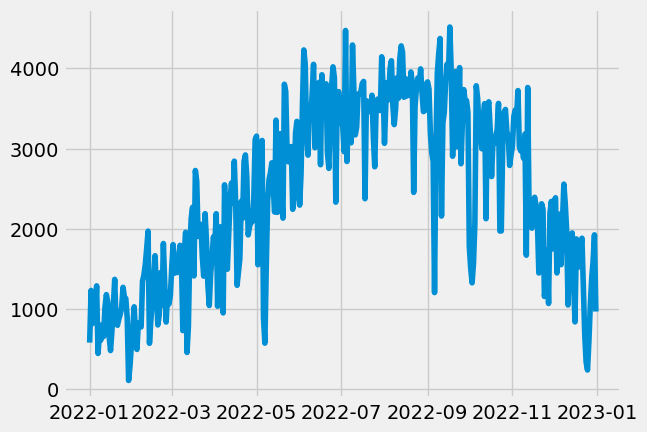

In [46]:
plt.plot(unique_date_uses)

## Decompose the data’s components

In [47]:
decomposition = sm.tsa.seasonal_decompose(unique_date_uses, model='additive')

In [48]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

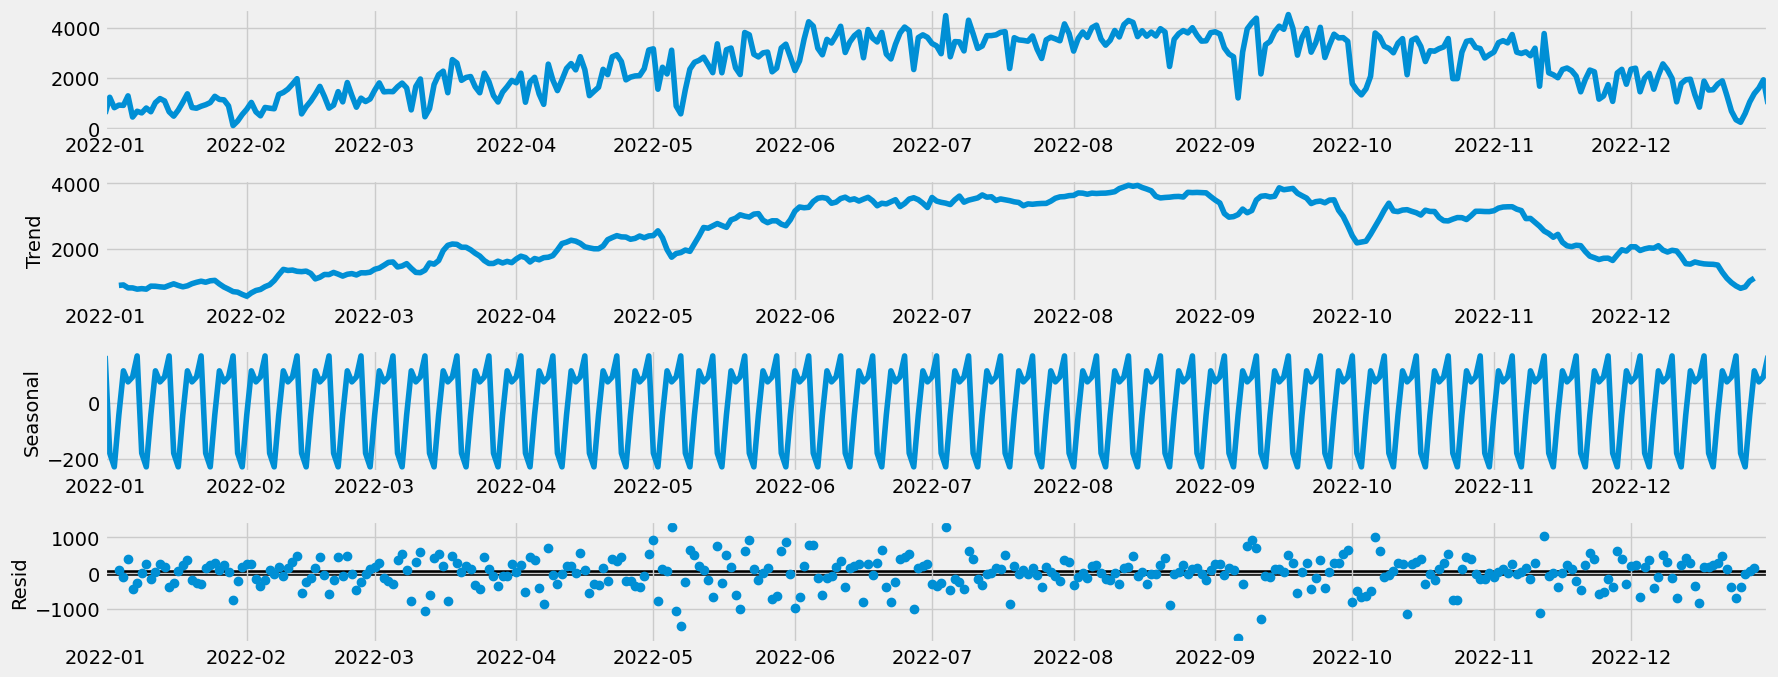

In [49]:
# Plot the separate components

decomposition.plot()
plt.show()

In [50]:
pd.set_option("display.max_rows", None)
unique_date_uses


,uses_by_date
datetime,
2022-01-01,582
2022-01-02,1232
2022-01-03,819
2022-01-04,922
2022-01-05,911
2022-01-06,1289
2022-01-07,447
2022-01-08,677
2022-01-09,612


### Create citi_sorted sorting values using citi22 exicuted and used earlier in exercise

In [52]:
citi_sorted = citi22.sort_values(by=['start_date'])

In [53]:
citi_sorted.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,start_date,end_date,1col,uses_by_date
11206,classic_bike,2022-01-01 04:10:00,2022-01-01 04:14:19,Church Sq Park - 5 St & Park Ave,HB601,Willow Ave & 12 St,HB505,40.742659,-74.032233,40.751867,-74.030377,0,4,1,5,1,0 days 00:04:19,4.32,11859,9623,2022-01-01,2022-01-01,1,582
18112,electric_bike,2022-01-01 20:05:31,2022-01-01 20:11:44,8 St & Washington St,HB603,Adams St & 2 St,HB407,40.745984,-74.028199,40.739814,-74.036904,1,20,1,5,1,0 days 00:06:13,6.22,14385,9260,2022-01-01,2022-01-01,1,582
18114,classic_bike,2022-01-01 00:33:14,2022-01-01 00:43:16,Willow Ave & 12 St,HB505,Adams St & 2 St,HB407,40.751867,-74.030377,40.739814,-74.036904,1,0,1,5,1,0 days 00:10:02,10.03,9439,9260,2022-01-01,2022-01-01,1,582
12407,classic_bike,2022-01-01 22:38:42,2022-01-01 22:50:29,Grove St PATH,JC005,Lafayette Park,JC078,40.719586,-74.043117,40.713464,-74.062859,1,22,1,5,1,0 days 00:11:47,11.78,42455,7180,2022-01-01,2022-01-01,1,582
14256,electric_bike,2022-01-01 09:13:11,2022-01-01 09:15:47,JC Medical Center,JC011,Grove St PATH,JC005,40.716540,-74.049638,40.719586,-74.043117,1,9,1,5,1,0 days 00:02:36,2.60,10000,44730,2022-01-01,2022-01-01,1,582


## Perform Dickey Fuller Test

In [54]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(citi_sorted['uses_by_date'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.360431e+00
p-value                        2.482251e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    8.922800e+05
Critical Value (1%)           -3.430357e+00
Critical Value (5%)           -2.861543e+00
Critical Value (10%)          -2.566772e+00
dtype: float64


### The Test Statistic is smaller than all the 'Critical Values', therefore we CAN reject the null hypothesis.

## Check autocorrelations

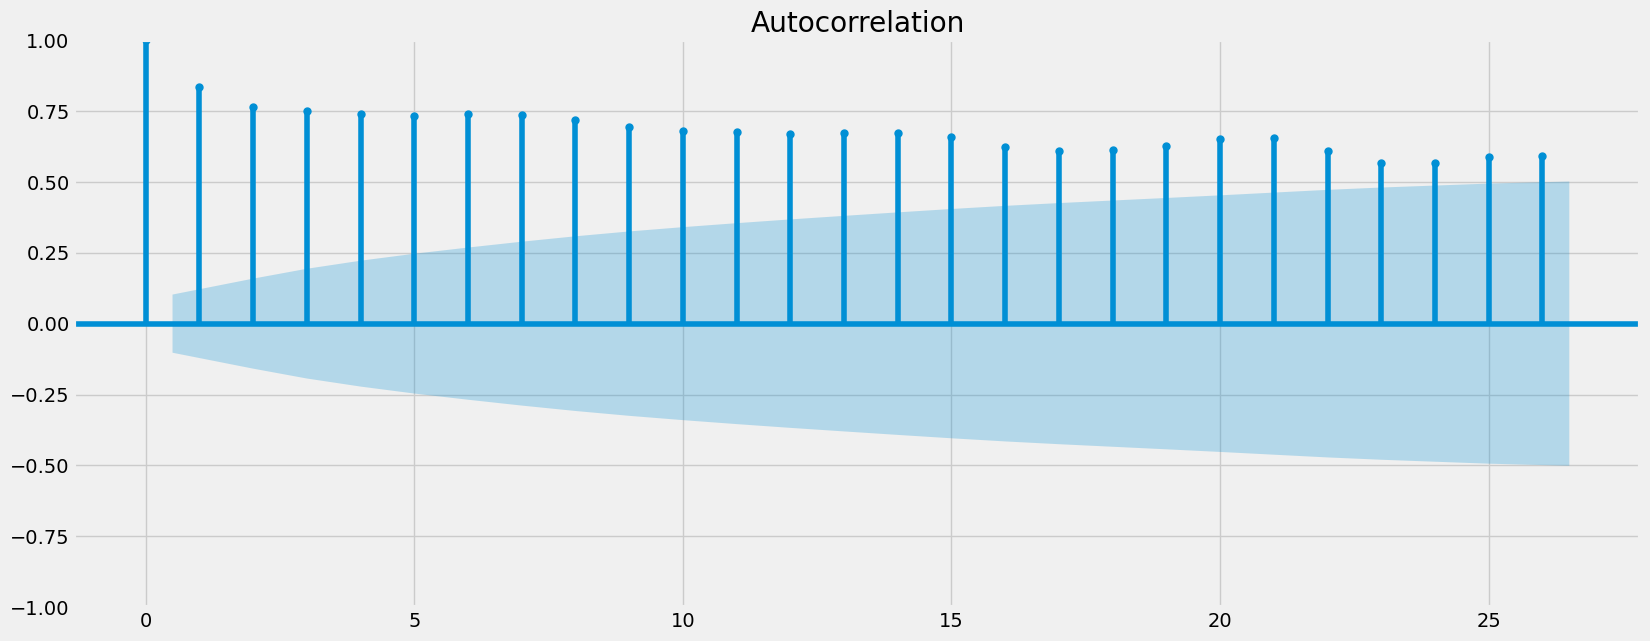

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(unique_date_uses)
plt.show()